<a href="https://colab.research.google.com/github/Paritoshyadav/pytorch_TRAINING-A-CLASSIFIER-from-scratch/blob/master/pytorch_TRAINING_A_CLASSIFIER_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Load and normalizing the CIFAR10 training and test datasets using torchvision
Define a Convolutional Neural Network
Define a loss function
Train the network on the training data
Test the network on the test data

In [0]:
!pip install --upgrade torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.3.0+cu100)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.4.1+cu100)


In [0]:
import torch
import torchvision
import torchvision.transforms as transform
import torch.utils.data.dataloader as Dataloader

In [0]:
trans =  transform.Compose([
    transform.Resize(32),#always mention resize before to tensor
    transform.ToTensor(),
    transform.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
    ])

In [3]:
train=torchvision.datasets.CIFAR10(root='train',train=True,transform=trans,download=True)



0it [00:00, ?it/s]

170500096it [00:06, 26220790.22it/s]                               


Extracting train/cifar-10-python.tar.gz to train


In [0]:
train_data=torch.utils.data.DataLoader(train,batch_size=4,shuffle=True,num_workers=4)

In [6]:
test=torchvision.datasets.CIFAR10(root='test',train=False,download=True,transform=trans)



0it [00:00, ?it/s]

170500096it [00:06, 28316552.36it/s]                               


Extracting test/cifar-10-python.tar.gz to test


In [0]:
test_data=torch.utils.data.DataLoader(test,batch_size=4,shuffle=True,num_workers=4) #num_worker = multiproceess if any +ve integers

In [0]:
print(train_data)

In [0]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
def imshow(img):
  img=img /2 + 0.5
  
  
  np_img=img.numpy()
  
  np_img=np.transpose(np_img, (1 ,2 ,0))#  in PyTorch, the order of dimension is channel*width*height but in matplotlib it’s width*height*channel
  
  plt.imshow(np_img)

  plt.show()

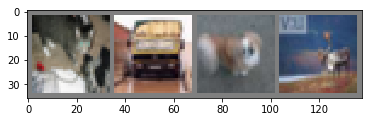

tensor([3, 9, 5, 4])
  cat truck   dog  deer


In [11]:
data_iter=iter(train_data)

data_img,labels=data_iter.next()

imshow(torchvision.utils.make_grid(data_img))
print(labels)
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F

In [0]:
device=('cuda:0' if torch.cuda.is_available() else 'cpu')

In [14]:
print(device)

cuda:0


In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)#Faltten or x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [52]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
t=list(net.parameters())
print(len(t))

10


In [0]:
import torch.optim as optim

In [0]:
C=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.0001,momentum=0.9)

In [0]:
for epoch in range(50):
  running_loss=0

  for i,data in enumerate(train_data,0):
    inputs,labels=data[0].to(device), data[1].to(device)
  
    optimizer.zero_grad()
    outputs=net(inputs)
    #print(i)
    loss=C(outputs,labels)
    loss.backward()
    optimizer.step()

    running_loss+=loss.item()
  
    if i % 2000 == 1999:
      print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0
print('finished training')

In [0]:
torch.save(net.state_dict(),'model.pth')

In [0]:
! mkdir model

In [0]:
path='model/model_state.pth'

In [0]:
torch.save(net(),path)

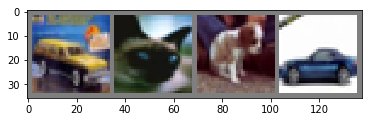

GroundTruth:    car   cat   dog   car


In [0]:
dataiter = iter(test_data)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
net=Net()

In [54]:
net.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [45]:
_,pred=torch.max(outputs,1)
print('pred:',''.join('%s' % classes[pred[j]] for j in range(4)))

pred: trucktrucktrucktruck


In [48]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  truck truck truck truck


In [46]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_data:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 9 %


In [0]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in test_data:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))